In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir

method = 'spm-mcmc-estw'
filedir = f'../../surveys-save/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}.splcds'
filedict = get_dict_from_filedir(filedir)
root_folder = filedict['_rootdir']
cfilename = filedict['_cfilename']
survey = filedict['survey']
lcdataset = load_pickle(filedir)
print(lcdataset)

LCDataset:
[outliers - samples 10]
(.) obs_samples=541 - min_len=14 - max_dur=408.0[days] - dur(p50)=133.8[days] - cadence(p50)=1.0[days]
(g) obs_samples=260 - min_len=6 - max_dur=408.0[days] - dur(p50)=133.8[days] - cadence(p50)=3.0[days]
(r) obs_samples=281 - min_len=8 - max_dur=376.0[days] - dur(p50)=128.7[days] - cadence(p50)=3.0[days]
   |█▌      | SLSN - 2/10 (20.00%)
   |▊       | SNIa - 1/10 (10.00%)
   |█▌      | SNIbc - 2/10 (20.00%)
   |████    | allSNII - 5/10 (50.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint - samples 48]
(.) obs_samples=1,107 - min_len=7 - max_dur=298.1[days] - dur(p50)=40.5[days] - cadence(p50)=1.0[days]
(g) obs_samples=450 - min_len=0 - max_dur=221.7[days] - dur(p50)=28.0[days] - cadence(p50)=2.9[days]
(r) obs_samples=657 - min_len=4 - max_dur=298.1[days] - dur(p50)=38.9[days] - cadence(p50)=2.9[days]
   |█▏      | SLSN - 7/48 (14.58%)
   |███▊    | SNIa - 23/48 (47.92%)
   |▌       | SN

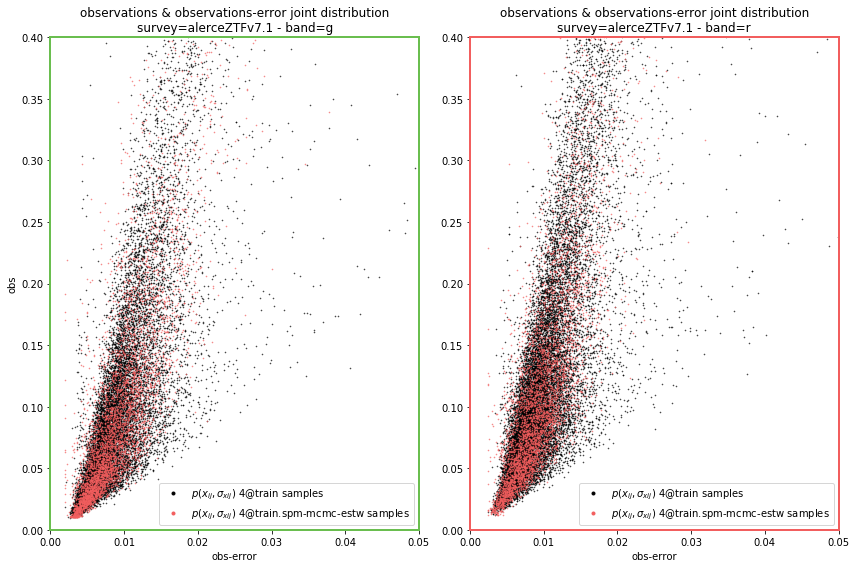

In [3]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.scatters import plot_obs_obse_scatter

kf = '4'
plot_ndict = {
    f'{kf}@train':None,
    f'{kf}@train.{method}':5e3,
}
plot_obs_obse_scatter(lcdataset, list(plot_ndict.keys()), plot_ndict)

In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lcfats.map2d import get_fitted_maps2d
import matplotlib.pyplot as plt
from lcfats.plots.projs2d import plot_projections
from flamingchoripan.progress_bars import ProgressBar
from flamingchoripan.cuteplots.utils import save_fig
from flamingchoripan.strings import get_string_from_dict
from flamingchoripan.datascience.grid_search import GDIter, GridSeacher

grid_params = {
    'min_dist':0.5,
    'n_neighbors':GDIter(*np.linspace(10, 50, 8).astype(np.int)[::-1]),
}
gs = GridSeacher(grid_params)
bar = ProgressBar(len(gs))
for params in gs:
    bar(str(params))
    lcset_name = f'{kf}@train.{method}'
    load_rootdir = f'../save/fats/{cfilename}'
    map_kwargs = {
        'mode':'pca+umap',
        'min_dist':params['min_dist'],
        'n_neighbors':params['n_neighbors'],
    }
    maps2d_dict = get_fitted_maps2d(lcdataset, lcset_name, load_rootdir, **map_kwargs)
    class_names = lcdataset['raw'].class_names
    for c in [None]+class_names:
        fig = plot_projections(maps2d_dict, c)
        if c is None:
            save_filedir = f'../save/umap/{cfilename}/{kf}@train/{get_string_from_dict(params)}.png'
        else:
            save_filedir = f'../save/umap/{cfilename}/{kf}@train/{get_string_from_dict(params)}/{c}.png'
        save_fig(save_filedir, fig)
        
bar.done()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
100%|██████████| 8/8 [33:50, 253.85s/it, {'min_dist': 0.5, 'n_neighbors': 10}]
